# AIと友達になろう！高校生のためのTransformer完全入門：
# PyTorchで学ぶ大規模言語モデルのしくみ


# Part 1: 冒険の準備をしよう！

# Step 1: AIの世界へようこそ！環境構築と最初のプログラム


In [4]:
# Google ColabからGoogleドライブにアクセスするための準備
from google.colab import drive
drive.mount('/content/drive')

# これで、Colabの中から自分のドライブが見えるようになりました！
#!lsコマンドは、ファイルやフォルダの一覧を表示するおまじないです。
!ls "/content/drive/MyDrive/Mago_Serise/mago201(Transformer)/transformer-tutorial"

Mounted at /content/drive
data  LLM_Transformer.ipynb  step01_hello_ai.py


In [5]:
# 自分のGoogleドライブにある、先ほどアップロードしたフォルダに移動します。
# このパスは、自分の環境に合わせて変更してください。
%cd "/content/drive/MyDrive/Mago_Serise/mago201(Transformer)/transformer-tutorial/"

# Step1のプログラムを実行します！
!python step01_hello_ai.py


/content/drive/MyDrive/Mago_Serise/mago201(Transformer)/transformer-tutorial
Hello, AI World! これからTransformerを作る冒険を始めよう！
PyTorchのバージョン: 2.2.2+cu121
GPUは正しく認識されています: NVIDIA A100-SXM4-40GB (1個のGPUが利用可能です)


# Step 2: AIの「言語」を学ぶ - PyTorchのテンソル（Tensor）入門

In [6]:
import torch
import numpy as np

# --- テンソルの作成 ---

# 1. Pythonのリストから作成
data_list = [[1, 2], [3, 4]]
x_from_list = torch.tensor(data_list)
print(f"リストから作成したテンソル:\n {x_from_list}\n")

# 2. NumPyの配列から作成
data_numpy = np.array([[1, 2], [3, 4]])
x_from_numpy = torch.from_numpy(data_numpy)
print(f"NumPy配列から作成したテンソル:\n {x_from_numpy}\n")

# 3. すべてが0や1のテンソルを作成
# shapeはテンソルの形（次元ごとの要素数）を指定するタプル
shape = (2, 3) # 2行3列の形
zeros_tensor = torch.zeros(shape)
ones_tensor = torch.ones(shape)
print(f"すべて0のテンソル:\n {zeros_tensor}\n")
print(f"すべて1のテンソル:\n {ones_tensor}\n")

# 4. 0から1までの乱数で埋められたテンソルを作成
rand_tensor = torch.rand(shape)
print(f"乱数テンソル:\n {rand_tensor}\n")


# --- テンソルの属性（プロパティ） ---
print("--- 属性の確認 ---")
print(f"形状 (shape): {rand_tensor.shape}")
print(f"データ型 (dtype): {rand_tensor.dtype}")
print(f"保存されているデバイス (device): {rand_tensor.device}\n")


# --- テンソルの操作 ---
print("--- 操作の確認 ---")
tensor = torch.ones(4, 4) # 4x4のすべて1のテンソルを作成
print(f"元のテンソル:\n {tensor}\n")

# 1. 算術演算
tensor_plus_2 = tensor.add(2) # 各要素に2を足す
print(f"各要素に2を足したテンソル:\n {tensor_plus_2}\n")

# 2. インデックスとスライス（NumPyとそっくり！）
print(f"最初の行: {tensor}")
print(f"最初の列: {tensor[:, 0]}")
print(f"最後の列: {tensor[..., -1]}\n")

# 3. 特定の場所に値を代入
tensor[:, 1] = 0 # 2列目（インデックスは1）のすべての要素を0にする
print(f"2列目を0にしたテンソル:\n {tensor}\n")


リストから作成したテンソル:
 tensor([[1, 2],
        [3, 4]])

NumPy配列から作成したテンソル:
 tensor([[1, 2],
        [3, 4]])

すべて0のテンソル:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])

すべて1のテンソル:
 tensor([[1., 1., 1.],
        [1., 1., 1.]])

乱数テンソル:
 tensor([[0.3111, 0.6124, 0.4256],
        [0.9368, 0.4052, 0.6857]])

--- 属性の確認 ---
形状 (shape): torch.Size([2, 3])
データ型 (dtype): torch.float32
保存されているデバイス (device): cpu

--- 操作の確認 ---
元のテンソル:
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

各要素に2を足したテンソル:
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

最初の行: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
最初の列: tensor([1., 1., 1., 1.])
最後の列: tensor([1., 1., 1., 1.])

2列目を0にしたテンソル:
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])



# Step 3: AIの「教科書」を準備する - データセットとデータローダー


In [7]:
import torch
from torch.utils.data import Dataset, DataLoader

# 1. カスタムデータセットの作成
# torch.utils.data.Datasetクラスを継承する
class NumberDataset(Dataset):
    """0から99までの数字とそのラベル（偶数か奇数か）を扱うデータセット"""

    # 初期化メソッド：最初に一度だけ呼ばれる
    def __init__(self):
        # 0から99までの数字のテンソルを作成
        self.data = torch.arange(100, dtype=torch.float32).view(-1, 1)
        # 各数字が偶数(0)か奇数(1)かのラベルを作成
        self.labels = (self.data % 2).squeeze().long() # ラベルは整数型にするのが一般的

    # データセットの長さを返すメソッド
    def __len__(self):
        return len(self.data)

    # 指定されたインデックスのデータとラベルを返すメソッド
    def __getitem__(self, idx):
        # idx番目のデータとラベルを取得
        sample_data = self.data[idx]
        sample_label = self.labels[idx]
        # 辞書形式で返す（他の形式でもOK）
        return {"data": sample_data, "label": sample_label}

# 2. データセットのインスタンス化
# 作成したNumberDatasetクラスから、実際のデータセットオブジェクトを作る
my_dataset = NumberDataset()

# 試しに3番目（インデックスは2）のデータを取得してみる
print(f"3番目のデータ: {my_dataset[2]}\n")
# 試しにデータセットの長さを確認してみる
print(f"データセットの総数: {len(my_dataset)}\n")


# 3. DataLoaderの作成
# 作成したデータセットをDataLoaderでラップする
# batch_size: 1回に取り出すデータ数（ミニバッチのサイズ）
# shuffle: データをシャッフルするかどうか
my_dataloader = DataLoader(dataset=my_dataset, batch_size=10, shuffle=True)

# 4. DataLoaderからデータを取り出してみる
print("--- DataLoaderからデータを取り出す ---")
# DataLoaderはイテレータなので、forループでバッチを取り出せる
for i, batch in enumerate(my_dataloader):
    print(f"バッチ {i+1}:")
    print(f"  データ: {batch['data'].squeeze().tolist()}") #.squeeze()で余分な次元を削除し、見やすくするためにリストに変換
    print(f"  ラベル: {batch['label'].tolist()}")
    # 最初の2バッチだけ表示してループを抜ける
    if i == 1:
        break


3番目のデータ: {'data': tensor([2.]), 'label': tensor(0)}

データセットの総数: 100

--- DataLoaderからデータを取り出す ---
バッチ 1:
  データ: [1.0, 47.0, 85.0, 36.0, 8.0, 15.0, 68.0, 25.0, 98.0, 84.0]
  ラベル: [1, 1, 1, 0, 0, 1, 0, 1, 0, 0]
バッチ 2:
  データ: [66.0, 44.0, 53.0, 95.0, 3.0, 48.0, 35.0, 91.0, 33.0, 96.0]
  ラベル: [0, 0, 1, 1, 1, 0, 1, 1, 1, 0]


# Step 4: AIの「脳」の設計図 - ニューラルネットワークの基本構造

In [8]:
import torch
from torch import nn

# 1. ニューラルネットワークの設計図（クラス）を定義
# nn.Moduleを継承する
class SimpleModel(nn.Module):
    # 2. 初期化メソッドで、モデルの部品（層）を定義
    def __init__(self):
        # 親クラス(nn.Module)の__init__を忘れずに呼び出す
        super().__init__()

        # 今回使う部品は、入力が1次元、出力が1次元の線形層だけ
        # y = Wx + b の計算をしてくれる層
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    # 3. 順伝播メソッドで、データの流れを定義
    def forward(self, x):
        # 入力xを、先ほど定義した線形層に通す
        output = self.linear_layer(x)
        # 結果を返す
        return output

# 4. モデルのインスタンスを作成
# 設計図から、実際のモデルオブジェクトを作る
model = SimpleModel()

# モデルの構造を表示してみる
print("--- モデルの構造 ---")
print(model)
print("\n")

# 5. 実際にデータを通してみる
# 入力データとして、1つの要素を持つテンソルを作成
# [[10.0]] のような形にする（バッチサイズ1, 特徴量1）
input_data = torch.tensor([[10.0]])

# model(input_data) と書くことで、自動的にforwardメソッドが呼び出される
predicted_value = model(input_data)

print(f"--- 予測の実行 ---")
print(f"入力値: {input_data.item()}")
print(f"モデルによる予測値: {predicted_value.item()}")
print("\n")

# おまけ：モデルが持っている「重み(W)」と「バイアス(b)」を見てみる
# これらはモデル作成時にランダムな値で初期化されている
print("--- モデルの内部パラメータ ---")
for name, param in model.named_parameters():
    if param.requires_grad:
        if "weight" in name:
            print(f"重み (W): {param.data.item()}")
        elif "bias" in name:
            print(f"バイアス (b): {param.data.item()}")


--- モデルの構造 ---
SimpleModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)


--- 予測の実行 ---
入力値: 10.0
モデルによる予測値: 7.772337913513184


--- モデルの内部パラメータ ---
重み (W): 0.7235610485076904
バイアス (b): 0.5367275476455688


# Part 2: Transformer登場以前の世界 - RNNを体験しよう

# Step 5: 順番が大切なデータ - 時系列データとRNNの考え方


私たちが扱う自然言語では、「順番」が命です。
I have a pen.
この文を理解するには、I → have → a → pen という順番で単語を読んでいく必要があります。
この「順番」を扱うために考案されたのが、**再帰型ニューラルネットワーク（RNN）**です。


# Step 6: [ハンズオン] 文字レベルRNNで名前の国籍を予測しよう！ (モデル構築編)

In [9]:
# Step 6: [ハンズオン] 文字レベルRNNで名前の国籍を予測しよう！ (モデル構築編)
# 完全版プログラム

import torch
from torch import nn
import glob
import unicodedata
import string
import os

# --- 1. データの前処理 ---

# 使用するすべての文字（アルファベット + 記号）を定義
ALL_LETTERS = string.ascii_letters + " .,;'"
N_LETTERS = len(ALL_LETTERS)

def unicode_to_ascii(s):
    """
    Unicode文字列をASCII文字に正規化する関数
    例: Ślusàrski -> Slusarski
    """
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in ALL_LETTERS
    )

# データを読み込むための準備
category_lines = {}
all_categories = []

# data/names/ ディレクトリのパスを指定（環境に合わせて変更してください）
PATH_TO_DATA = "/content/drive/MyDrive/Mago_Serise/mago201(Transformer)/transformer-tutorial/data/names/*.txt"

for filename in glob.glob(PATH_TO_DATA):
    # ファイル名からカテゴリ（言語名）を取得
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)

    # ファイルを読み込み、ASCIIに変換してリストに格納
    with open(filename, encoding='utf-8') as f:
        lines = f.read().strip().split('\n')
        lines = [unicode_to_ascii(line) for line in lines]
        category_lines[category] = lines

N_CATEGORIES = len(all_categories)

if N_CATEGORIES == 0:
    print("!!! データが読み込めませんでした。PATH_TO_DATAのパスを確認してください !!!")
else:
    print(f"カテゴリ（言語）数: {N_CATEGORIES}")
    print(f"カテゴリリスト: {all_categories}")
    print(f"文字数: {N_LETTERS}")
    print(f"日本語の名前の例: {category_lines['Japanese'][:5]}\n")

# --- 2. データをテンソルに変換する関数 ---

def letter_to_index(letter):
    """文字をALL_LETTERS内のインデックスに変換する"""
    return ALL_LETTERS.find(letter)

def line_to_tensor(line):
    """
    名前（文字列）をワンホットベクトルの系列（テンソル）に変換する
    出力shape: [line_length, 1, n_letters]
    """
    tensor = torch.zeros(len(line), 1, N_LETTERS)
    for i, letter in enumerate(line):
        tensor[i][0][letter_to_index(letter)] = 1
    return tensor

# 例：'Sato'をテンソルに変換してみる
sato_tensor = line_to_tensor('Sato')
print(f"'Sato'のテンソル形状: {sato_tensor.shape}")
print(f"1文字目の'S'のテンソル（一部）: {sato_tensor[0][0][:20]}...") # 長いので一部表示


# --- 3. RNNモデルの構築 ---

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        # 入力と隠れ状態を結合したベクトルから、次の隠れ状態と出力を計算する線形層を定義
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        # 出力を対数確率に変換するためのLogSoftmax層
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_tensor, hidden_tensor):
        # 入力テンソルと隠れ状態テンソルを結合
        combined = torch.cat((input_tensor, hidden_tensor), 1)

        # 新しい隠れ状態と出力を計算
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output) # Softmaxで確率に変換
        return output, hidden

    def init_hidden(self):
        """隠れ状態をゼロで初期化するヘルパー関数"""
        return torch.zeros(1, self.hidden_size)

# モデルのインスタンスを作成
n_hidden = 128 # 隠れ層のサイズ
rnn = RNN(N_LETTERS, n_hidden, N_CATEGORIES)

# --- 4. 動作確認 ---
# 'S'という文字と初期隠れ状態を入力してみる
input_char_tensor = line_to_tensor('S')[0] # 'S'の1文字分だけ取り出す
hidden_tensor = rnn.init_hidden()
output, next_hidden = rnn(input_char_tensor, hidden_tensor)

print(f"\n--- モデルの動作確認 ---")
print(f"入力の形状: {input_char_tensor.shape}")
print(f"隠れ状態の形状: {hidden_tensor.shape}")
print(f"出力の形状: {output.shape}")
print(f"次の隠れ状態の形状: {next_hidden.shape}")

カテゴリ（言語）数: 18
カテゴリリスト: ['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']
文字数: 57
日本語の名前の例: ['Sato', 'Suzuki', 'Takahashi', 'Tanaka', 'Watanabe']

'Sato'のテンソル形状: torch.Size([4, 1, 57])
1文字目の'S'のテンソル（一部）: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])...

--- モデルの動作確認 ---
入力の形状: torch.Size([1, 57])
隠れ状態の形状: torch.Size([1, 128])
出力の形状: torch.Size([1, 18])
次の隠れ状態の形状: torch.Size([1, 128])


# Step 7: [ハンズオン] 文字レベルRNNで名前の国籍を予測しよう！ (学習・評価編)


学習を開始します...
  5000   5% (9.31s) 2.0262 Horak / Czech ✓
 10000  10% (18.55s) 0.6926 Lopez / Spanish ✓
 15000  15% (27.55s) 0.1553 Janssen / Dutch ✓
 20000  20% (36.78s) 0.1266 Williams / English ✓
 25000  25% (46.05s) 0.0571 Lee / Korean ✓
 30000  30% (55.36s) 0.0034 Mylonas / Greek ✓
 35000  35% (64.37s) 0.0088 Meyer / German ✓
 40000  40% (73.60s) 0.0199 Tanaka / Japanese ✓
 45000  45% (82.86s) 0.0412 Novak / Czech ✓
 50000  50% (92.16s) 0.0119 Huynh / Vietnamese ✓
 55000  55% (101.15s) 0.0183 Costa / Portuguese ✓
 60000  60% (110.39s) 0.0072 Lee / Korean ✓
 65000  65% (119.67s) 0.0028 Murphy / Irish ✓
 70000  70% (129.00s) 0.0008 Esposito / Italian ✓
 75000  75% (138.19s) 0.0231 Park / Korean ✓
 80000  80% (147.48s) 0.0014 Ferreira / Portuguese ✓
 85000  85% (156.88s) 0.0001 Sokolov / Russian ✓
 90000  90% (166.12s) 0.0372 Scott / Scottish ✓
 95000  95% (175.30s) 0.0001 Papadakis / Greek ✓
100000 100% (184.51s) 0.0080 Park / Korean ✓
学習が完了しました。


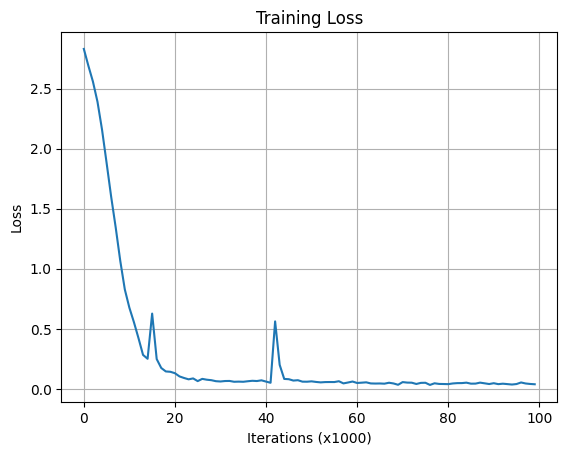

モデルの評価を開始します...


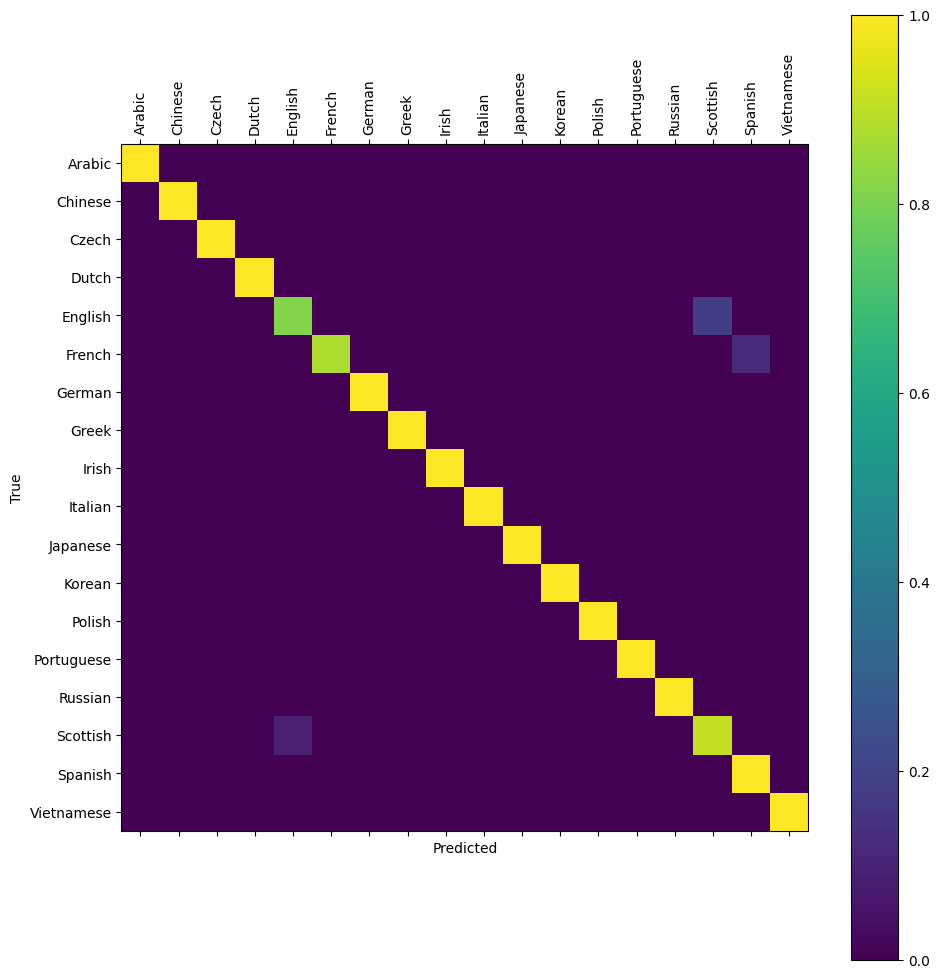

In [10]:
# Step 7: [ハンズオン] 文字レベルRNNで名前の国籍を予測しよう！ (学習・評価・可視化編)
# 完全版プログラム

# このスクリプトは、Step 6のコードが実行され、以下の変数が定義済みであることを前提とします。
# rnn, N_CATEGORIES, all_categories, category_lines, line_to_tensor, category_from_output

import random
import time
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 1. 学習の準備 ---

# 損失関数を定義 (Negative Log Likelihood Loss)
# [cite_start]RNNモデルの出力層がLogSoftmaxなので、NLLLossと組み合わせるのが一般的 [cite: 25]
criterion = nn.NLLLoss()

# 学習率
learning_rate = 0.005

def category_from_output(output):
    """出力テンソルから最も確率の高いカテゴリ名とインデックスを返す"""
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

def random_training_example():
    """学習用のランダムなデータ（名前とカテゴリ）を1つ選んでテンソルに変換して返す"""
    category = random.choice(all_categories)
    line = random.choice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = line_to_tensor(line)
    return category, line, category_tensor, line_tensor

# --- 2. モデルの訓練 ---

def train(category_tensor, line_tensor):
    """1つのデータサンプルでモデルを訓練する関数"""
    hidden = rnn.init_hidden()
    rnn.zero_grad() # 勾配をリセット

    # 名前を一文字ずつRNNに入力
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    # 最後の文字の出力と正解ラベルで損失を計算
    loss = criterion(output, category_tensor)

    # 誤差逆伝播
    loss.backward()

    # パラメータの更新
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

# --- 学習の実行 ---
n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss = 0
all_losses = []

start = time.time()

print("学習を開始します...")
for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = random_training_example()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # 進捗と結果の表示
    if iter % print_every == 0:
        guess, guess_i = category_from_output(output)
        correct = '✓' if guess == category else f'✗ (正解: {category})'
        elapsed = time.time() - start
        print(f'{iter:>6} {iter / n_iters * 100:>3.0f}% ({elapsed:.2f}s) {loss:.4f} {line} / {guess} {correct}')

    # プロット用に損失を記録
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

print("学習が完了しました。")

# --- 学習損失のプロット ---
plt.figure()
plt.plot(all_losses)
plt.title('Training Loss')
plt.xlabel('Iterations (x1000)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


# --- 3. モデルの評価（混同行列） ---

print("モデルの評価を開始します...")
# 混同行列を準備（カテゴリ数 x カテゴリ数のゼロ行列）
confusion = torch.zeros(N_CATEGORIES, N_CATEGORIES)
n_confusion = 10000 # 評価に使用するデータ数

def evaluate(line_tensor):
    """学習なしで、入力に対するモデルの出力を返す"""
    hidden = rnn.init_hidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    return output

# 評価の実行
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = random_training_example()
    output = evaluate(line_tensor)
    guess, guess_i = category_from_output(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# 各行をその合計で割り、確率に正規化
for i in range(N_CATEGORIES):
    confusion[i] = confusion[i] / confusion[i].sum()

# --- 混同行列のプロット ---
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy(), cmap='viridis')
fig.colorbar(cax)

ax.set_xticks(range(len(all_categories)))
ax.set_yticks(range(len(all_categories)))
ax.set_xticklabels(all_categories, rotation=90)
ax.set_yticklabels(all_categories)

# x軸とy軸のラベルを設定
ax.set_xlabel("Predicted")
ax.set_ylabel("True")

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.tight_layout()
plt.show()

## なぜ常に「Japanese」と予測してしまうのか？
結論から言うと、モデルが**「学習に失敗し、最も無難な答えを言い続ける」という局所的な最適解（Local Minimum）に陥ってしまっている**状態です。

## 1. 学習方法の課題：「期末テスト一発勝負」方式
現在のtrain関数を見てみましょう。



```
# 名前を一文字ずつRNNに入力
for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

# "最後の文字"の出力と正解カテゴリで損失を計算
loss = criterion(output, category_tensor)
loss.backward()
```


このコードは、名前の文字を 'S' → 'm' → 'i' → 't' → 'h' と順に読み込ませ、最後の文字 'h' を処理し終わった時点での一度きりの予測結果 (output) と正解を比べています。

これは、生徒に教科書を最初から最後まで読ませて、最後の単語だけを元に「この本全体のテーマは何ですか？」と質問し、その一回の回答だけで成績を決めるようなものです。モデルは、名前の最初の部分の情報を、最後の文字まで隠れ状態（hidden）という記憶だけで運び続けなければなりません。

## 2. シンプルなRNNの限界：勾配消失問題（Vanishing Gradient Problem）
シンプルなRNNには、「長い系列の最初の情報を忘れてしまう」という弱点があります 。


学習時、最後の文字での誤差（loss）を基に「どうすれば正解に近づけるか」という修正信号（勾配）が、最後の文字から最初の文字へと逆向きに伝えられます。しかし、この信号は伝言ゲームのように、系列を遡るにつれてどんどん弱く（または極端に強く）なってしまいます。

その結果、モデルは名前の最後の数文字しか実質的に学習できず、最初の文字（例：「Schmidt」の 'S' や 'c'）が何であったかの情報を使ってパラメータを更新することが非常に困難になります。

## 3. 学習の放棄と「無難な答え」
十分な情報を得られないモデルは、複雑なパターンを学習することを諦め、「とりあえずどれか一つの答えを言い続ければ、そこそこのスコアになるだろう」という安易な方法を見つけ出してしまいます。これが、常に同じ答え（今回はたまたま「Japanese」）を予測する原因です。どの言語に収束するかは、実行時のパラメータの初期値など、偶然によって決まることが多いです。

# Step 6-2: [ハンズオン] LSTMで名前の国籍を予測しよう！ (モデル構築編)

# 📘 教材の説明
このステップでは、前回学習に失敗したシンプルなRNNモデルを、より高性能な**LSTM (Long Short-Term Memory)**モデルに置き換えて再構築します。学習が進まなかった根本的な原因である「勾配消失問題」を解決することが目的です。

主な変更点は以下の通りです。

nn.Embeddingレイヤーの導入: 文字を「ワンホットベクトル」から、より表現力豊かで効率的な「埋め込みベクトル」に変換します。

nn.LSTMレイヤーの採用: シンプルなRNNセルの代わりに、長期的な情報の記憶が得意なLSTMセルを使用します。これにより、名前の最初の文字から最後の文字まで、文脈を失わずに情報を伝える能力が大幅に向上します。

モデル構造の変更: 新しいレイヤーに合わせて、モデルのforwardパス（データの流れ）を、名前全体を一度に処理できるように変更します。

このステップを完了すると、学習の準備が整った強力な分類モデルが手に入ります。

In [11]:
# ======================================================================
# Step 6-2: LSTMモデルによる名前の国籍予測 (モデル構築編)
# ======================================================================

import torch
import torch.nn as nn
import glob
import unicodedata
import string
import os

# --- 1. データの前処理 (変更なし) ---
print("--- 1. データの前処理 ---")

# 使用するすべての文字（アルファベット + 記号）を定義
ALL_LETTERS = string.ascii_letters + " .,;'"
N_LETTERS = len(ALL_LETTERS)

def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in ALL_LETTERS
    )

# データの読み込み
category_lines = {}
all_categories = []

# Google Colabで 'transformer-tutorial' フォルダをマイドライブ直下に置いた場合
# このパスはご自身の環境に合わせて修正してください
PATH_TO_DATA = "/content/drive/MyDrive/Mago_Serise/mago201(Transformer)/transformer-tutorial/data/names/*.txt"

for filename in glob.glob(PATH_TO_DATA):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    with open(filename, encoding='utf-8') as f:
        lines = f.read().strip().split('\n')
        lines = [unicode_to_ascii(line) for line in lines]
        category_lines[category] = lines

N_CATEGORIES = len(all_categories)

if N_CATEGORIES == 0:
    print("!!! データが読み込めませんでした。PATH_TO_DATAのパスを確認してください !!!")
else:
    print(f"カテゴリ（言語）数: {N_CATEGORIES}")
    print(f"文字数: {N_LETTERS}")
    print(f"日本語の名前の例: {category_lines['Japanese'][:5]}\n")


# --- 2. LSTMモデルの定義 ---
print("--- 2. LSTMモデルの定義 ---")

class RNN_LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size):
        super(RNN_LSTM, self).__init__()
        self.hidden_size = hidden_size

        # Embeddingレイヤー: 文字のインデックスを密なベクトルに変換
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # LSTMレイヤー: 埋め込みベクトル系列から文脈を学習
        self.lstm = nn.LSTM(embedding_dim, hidden_size, batch_first=True)

        # Linearレイヤー: LSTMの出力を最終的なカテゴリ数にマッピング
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: (バッチサイズ, 系列長) の文字インデックステンソル
        embedded = self.embedding(x) # -> (バッチサイズ, 系列長, 埋め込み次元)

        # LSTMは系列全体の出力(lstm_out)と最後の隠れ状態/細胞状態を返す
        lstm_out, _ = self.lstm(embedded)

        # 系列の最後の時点での出力だけを取り出す
        last_output = lstm_out[:, -1, :] # -> (バッチサイズ, 隠れ層の次元)

        # 全結合層を通して最終予測を行う
        output = self.fc(last_output) # -> (バッチサイズ, カテゴリ数)
        return output

print("LSTMモデルクラスを定義しました。\n")


# --- 3. データをテンソルに変換するヘルパー関数 ---
def letter_to_index(letter):
    """文字をALL_LETTERS内のインデックスに変換"""
    return ALL_LETTERS.find(letter)

def line_to_tensor(line):
    """名前(文字列)を文字インデックスのテンソルに変換"""
    # [1, len(line)] の形状にする (バッチサイズ=1)
    tensor = torch.zeros(1, len(line)).long()
    for i, letter in enumerate(line):
        tensor[0][i] = letter_to_index(letter)
    return tensor

# --- 4. モデルのインスタンス化と動作確認 ---
print("--- 4. モデルのインスタンス化と動作確認 ---")
# ハイパーパラメータ
EMBEDDING_DIM = 128
HIDDEN_SIZE = 128

# モデルのインスタンスを作成
model = RNN_LSTM(N_LETTERS, EMBEDDING_DIM, HIDDEN_SIZE, N_CATEGORIES)
print("モデルの構造:")
print(model)

# 動作確認
test_line = "Sato"
test_tensor = line_to_tensor(test_line)
output = model(test_tensor)

print(f"\nテスト入力 ('{test_line}'):")
print(f"入力テンソルの形状: {test_tensor.shape}")
print(f"出力テンソルの形状: {output.shape} (バッチサイズ, カテゴリ数)")
print("=> Step 6 完了: モデルの構築と動作確認ができました。次はStep 7-2でこのモデルを訓練します。")

--- 1. データの前処理 ---
カテゴリ（言語）数: 18
文字数: 57
日本語の名前の例: ['Sato', 'Suzuki', 'Takahashi', 'Tanaka', 'Watanabe']

--- 2. LSTMモデルの定義 ---
LSTMモデルクラスを定義しました。

--- 4. モデルのインスタンス化と動作確認 ---
モデルの構造:
RNN_LSTM(
  (embedding): Embedding(57, 128)
  (lstm): LSTM(128, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=18, bias=True)
)

テスト入力 ('Sato'):
入力テンソルの形状: torch.Size([1, 4])
出力テンソルの形状: torch.Size([1, 18]) (バッチサイズ, カテゴリ数)
=> Step 6 完了: モデルの構築と動作確認ができました。次はStep 7-2でこのモデルを訓練します。


# Step 7-2: [ハンズオン] LSTMモデルで名前の国籍を予測しよう！ (学習・評価編)

# 📘 教材の説明
Step 6で構築した強力なLSTMモデルを使って、いよいよ学習と評価を行います。このステップでは、学習をより効率的かつ安定させるための現代的な部品を導入します。

損失関数とオプティマイザの変更:

nn.CrossEntropyLoss: LogSoftmaxとNLLLossの計算を一つにまとめた、分類問題で標準的に使われる損失関数です。数値的に安定しており、便利です。

torch.optim.Adam: 学習率を自動で調整してくれる高機能な最適化アルゴリズム（オプティマイザ）です。多くの場合、SGDよりも高速に良い結果が得られます。

シンプルな学習ループ:

LSTMモデルは名前全体を一度に処理できるため、以前のように1文字ずつループで入力する必要がありません。train関数が非常にシンプルになり、学習速度も向上します。

この学習を実行すると、前回のシンプルなRNNとは異なり、学習が進むにつれて損失（Loss）が着実に減少し、正解率が向上していく様子が確認できるはずです。最終的な混同行列では、対角線がはっきりと明るくなり、モデルが高い精度を達成したことが視覚的にわかります。

--- 1. 学習の準備 ---
損失関数(CrossEntropyLoss)とオプティマイザ(Adam)を準備しました。

--- 3. 学習の実行 ---
  5000   5% (12.48s) 0.0002 Wisniewski / Polish ✓
 10000  10% (24.94s) 0.0000 Prochazka / Czech ✓
 15000  15% (37.42s) 0.0018 Leroy / French ✓
 20000  20% (50.02s) 0.0003 Taylor / English ✓
 25000  25% (62.37s) 0.0002 Petridis / Greek ✓
 30000  30% (74.73s) 0.7380 Schmidt / French ✗ (正解: German)
 35000  35% (87.38s) 0.0001 Karagiannis / Greek ✓
 40000  40% (100.10s) 0.1180 Brown / English ✓
 45000  45% (112.74s) 0.0000 Pham / Vietnamese ✓
 50000  50% (125.50s) 0.0000 Watanabe / Japanese ✓
 55000  55% (138.51s) 0.0001 Marino / Italian ✓
 60000  60% (151.73s) 0.0096 Prochazka / Czech ✓
 65000  65% (165.01s) 0.0000 Mylonas / Greek ✓
 70000  70% (178.29s) 0.0001 Li / Chinese ✓
 75000  75% (192.03s) 0.0001 Khoury / Arabic ✓
 80000  80% (205.86s) 3.1039 Smith / English ✗ (正解: Scottish)
 85000  85% (219.69s) 0.0001 O'Connor / Irish ✓
 90000  90% (233.86s) 0.0001 Marino / Italian ✓
 95000  95% (248.12s) 0.0000 Naha

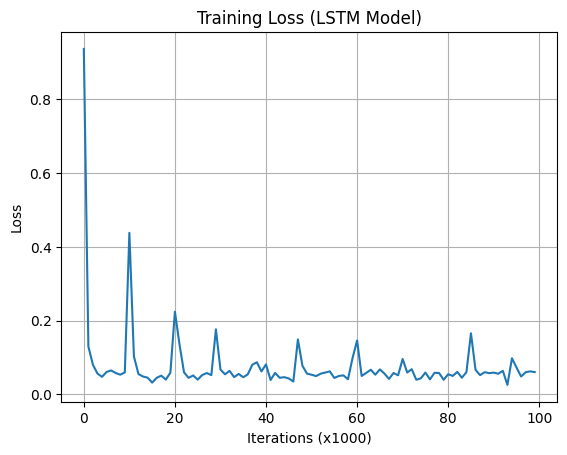

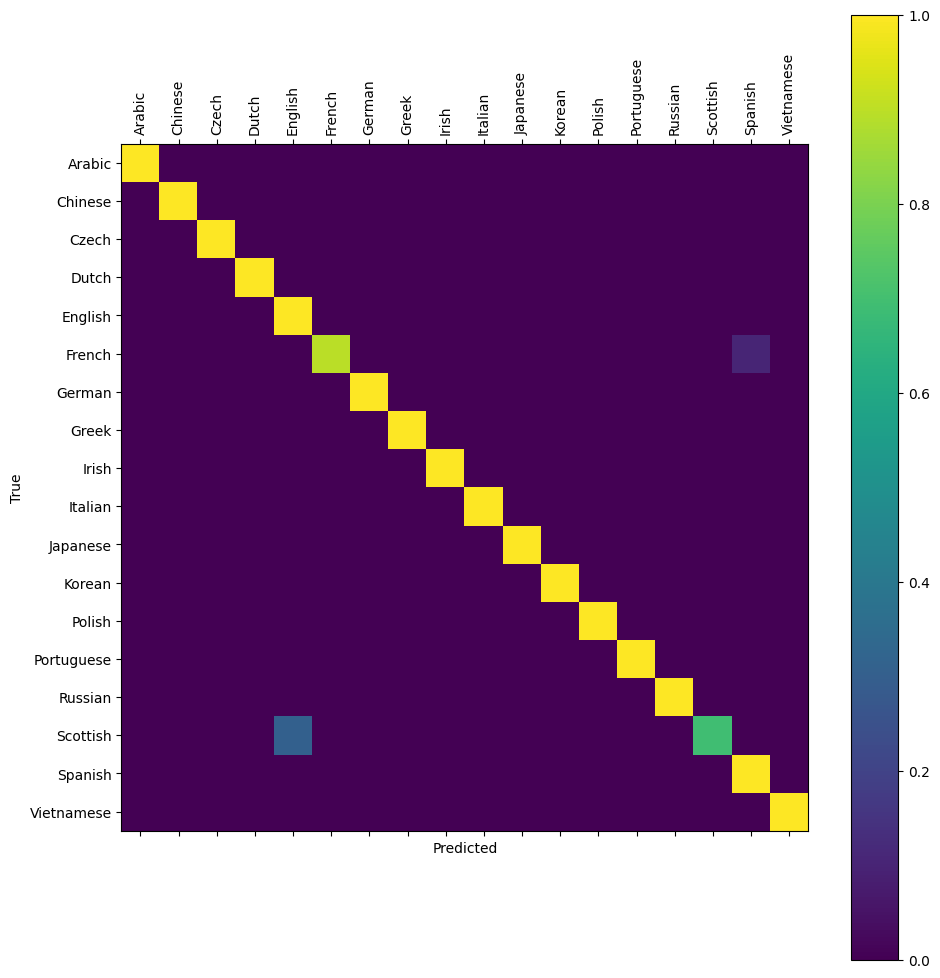

In [12]:
# ======================================================================
# Step 7-2: LSTMモデルによる名前の国籍予測 (学習・評価編)
# ======================================================================

import torch
import torch.nn as nn
import random
import time
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 1. 学習の準備 ---
print("--- 1. 学習の準備 ---")
# Step 6で定義した model, N_CATEGORIES, all_categories, category_lines, line_to_tensor を使用

# ハイパーパラメータ
LEARNING_RATE = 0.005 # Adamを使う場合、少し小さめに設定するのも良い

# 損失関数とオプティマイザ
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

def random_training_example():
    """学習用のデータをランダムに選び、テンソル形式で返す"""
    category = random.choice(all_categories)
    line = random.choice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = line_to_tensor(line) # Step 6で定義した関数
    return category, line, category_tensor, line_tensor

print("損失関数(CrossEntropyLoss)とオプティマイザ(Adam)を準備しました。\n")


# --- 2. 訓練関数の定義 ---
def train(category_tensor, line_tensor):
    optimizer.zero_grad()

    # モデルに名前全体を一度に入力
    output = model(line_tensor)

    loss = criterion(output, category_tensor)
    loss.backward()
    optimizer.step()

    return output, loss.item()

# --- 3. 学習の実行 ---
print("--- 3. 学習の実行 ---")
n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss = 0
all_losses = []
start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = random_training_example()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    if iter % print_every == 0:
        guess_i = torch.argmax(output, dim=1).item()
        guess = all_categories[guess_i]
        correct = '✓' if guess == category else f'✗ (正解: {category})'
        elapsed = time.time() - start
        print(f'{iter:>6} {iter / n_iters * 100:>3.0f}% ({elapsed:.2f}s) {loss:.4f} {line} / {guess} {correct}')

    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0
print("学習が完了しました。\n")


# --- 4. 結果の可視化 ---
print("--- 4. 結果の可視化 ---")

# 学習損失のプロット
plt.figure()
plt.plot(all_losses)
plt.title('Training Loss (LSTM Model)')
plt.xlabel('Iterations (x1000)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# 混同行列による評価
confusion = torch.zeros(N_CATEGORIES, N_CATEGORIES)
n_confusion = 10000

def evaluate(line_tensor):
    with torch.no_grad(): # 評価時は勾配計算をオフにする
        output = model(line_tensor)
        return output

for i in range(n_confusion):
    category, line, category_tensor, line_tensor = random_training_example()
    output = evaluate(line_tensor)
    guess_i = torch.argmax(output, dim=1).item()
    category_i = category_tensor.item()
    confusion[category_i][guess_i] += 1

for i in range(N_CATEGORIES):
    if confusion[i].sum() > 0:
        confusion[i] = confusion[i] / confusion[i].sum()

# 混同行列のプロット
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy(), cmap='viridis')
fig.colorbar(cax)
ax.set_xticks(range(len(all_categories)))
ax.set_yticks(range(len(all_categories)))
ax.set_xticklabels(all_categories, rotation=90)
ax.set_yticklabels(all_categories)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.tight_layout()
plt.show()

# Part 3: Transformerの心臓部 - Attentionをマスターしよう

# Step 8: 「どこに注目すべきか？」 - Attentionメカニズムの直感的な理解


RNNの「忘れてしまう」という弱点を克服するために生まれた革命的なアイデア、それがAttentionメカニズムです。Transformerの核心とも言えるこの仕組みを、まずは直感的に理解しましょう。

# Step 9: [ハンズオン] Self-Attentionの部品作りと組み立て (Q, K, Vの生成)


In [16]:
# 1. 入力データの準備
import torch
from torch import nn

# 入力データ（3つの単語、各4次元）
# (seq_length, d_model) -> (3, 4)
x = torch.tensor([
    [1.0, 0.0, 1.0, 0.0], # 単語1
    [0.0, 2.0, 0.0, 2.0], # 単語2
    [1.0, 1.0, 1.0, 1.0]  # 単語3
])

print("--- 入力テンソル (x) ---")
print(x)
print(f"形状: {x.shape}\n")

--- 入力テンソル (x) ---
tensor([[1., 0., 1., 0.],
        [0., 2., 0., 2.],
        [1., 1., 1., 1.]])
形状: torch.Size([3, 4])



In [17]:
# 2. 重み行列の初期化
# 次元数を設定
d_model = 4 # 入力（埋め込み）ベクトルの次元
d_k = 3     # Key, Query ベクトルの次元
d_v = 3     # Value ベクトルの次元

# 重み行列の代わりとなる線形層を定義
# bias=Falseにすることで、純粋な行列の掛け算だけを行う
W_q = nn.Linear(d_model, d_k, bias=False)
W_k = nn.Linear(d_model, d_k, bias=False)
W_v = nn.Linear(d_model, d_v, bias=False)

# 実際のモデルでは重みはランダムに初期化されるが、
# ここでは結果を固定するために、特定の値を設定する
# (これは理解のための操作であり、通常は行わない)
torch.manual_seed(42) # 乱数シードを固定
W_q.weight.data = torch.tensor([[0., 1., 1., 0.], [1., 0., 0., 1.], [0., 0., 1., 1.]])
W_k.weight.data = torch.tensor([[1., 0., 1., 0.], [0., 1., 0., 1.], [1., 1., 0., 0.]])
W_v.weight.data = torch.tensor([[0., 1., 0., 0.], [1., 0., 1., 0.], [0., 0., 1., 1.]])

print("--- 重み行列 (W_q) ---")
print(W_q.weight.data)


--- 重み行列 (W_q) ---
tensor([[0., 1., 1., 0.],
        [1., 0., 0., 1.],
        [0., 0., 1., 1.]])


In [18]:
# 3. Q, K, Vベクトルの生成
# Q, K, Vを計算
# Q = X * W_q^T
# K = X * W_k^T
# V = X * W_v^T
# (nn.Linearは内部で転置して掛けるので、これでOK)
Q = W_q(x)
K = W_k(x)
V = W_v(x)

print("--- Query (Q) ---")
print(Q)
print(f"形状: {Q.shape}\n")

print("--- Key (K) ---")
print(K)
print(f"形状: {K.shape}\n")

print("--- Value (V) ---")
print(V)
print(f"形状: {V.shape}\n")


--- Query (Q) ---
tensor([[1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MmBackward0>)
形状: torch.Size([3, 3])

--- Key (K) ---
tensor([[2., 0., 1.],
        [0., 4., 2.],
        [2., 2., 2.]], grad_fn=<MmBackward0>)
形状: torch.Size([3, 3])

--- Value (V) ---
tensor([[0., 2., 1.],
        [2., 0., 2.],
        [1., 2., 2.]], grad_fn=<MmBackward0>)
形状: torch.Size([3, 3])



# Step 10: [ハンズオン] Self-Attentionの部品作りと組み立て (アテンションスコア計算)


In [19]:
# 1. スコアの計算 (Scaled Dot-Product)
import torch.nn.functional as F
import math

# Step 9で計算したQ, K, d_kを使用します
# Q = tensor([[1., 1., 1.], [2., 2., 0.], [1., 2., 2.]])
# K = tensor([[1., 0., 2.], [2., 2., 2.], [1., 1., 2.]])
# d_k = 3

# Kを転置する (K.T)
K_T = K.transpose(1, 0) # (seq_len, d_k) -> (d_k, seq_len)

# QとKの転置行列を掛け合わせる (行列積)
# (3, 3) @ (3, 3) -> (3, 3)
scores = torch.matmul(Q, K_T)

print("--- 生のスコア (Q @ K.T) ---")
print(scores)
print(f"形状: {scores.shape}\n")

# スケーリング
# d_kの平方根で割る
scaled_scores = scores / math.sqrt(d_k)

print("--- スケール後のスコア ---")
print(scaled_scores)
print(f"形状: {scaled_scores.shape}\n")



--- 生のスコア (Q @ K.T) ---
tensor([[ 3.,  6.,  6.],
        [ 6., 12., 12.],
        [ 6., 12., 12.]], grad_fn=<MmBackward0>)
形状: torch.Size([3, 3])

--- スケール後のスコア ---
tensor([[1.7321, 3.4641, 3.4641],
        [3.4641, 6.9282, 6.9282],
        [3.4641, 6.9282, 6.9282]], grad_fn=<DivBackward0>)
形状: torch.Size([3, 3])



In [20]:
# 2. 正規化 (Softmax)
# Softmaxを適用して、アテンションウェイトを計算
# dim=-1 は、各行ごとにSoftmaxを適用することを意味する
attention_weights = F.softmax(scaled_scores, dim=-1)

print("--- アテンションウェイト (Softmax適用後) ---")
print(attention_weights)
print(f"形状: {attention_weights.shape}\n")

# 各行の合計が1になっているか確認
print("--- 各行の合計 ---")
print(attention_weights.sum(dim=-1))


--- アテンションウェイト (Softmax適用後) ---
tensor([[0.0813, 0.4594, 0.4594],
        [0.0154, 0.4923, 0.4923],
        [0.0154, 0.4923, 0.4923]], grad_fn=<SoftmaxBackward0>)
形状: torch.Size([3, 3])

--- 各行の合計 ---
tensor([1., 1., 1.], grad_fn=<SumBackward1>)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 41.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


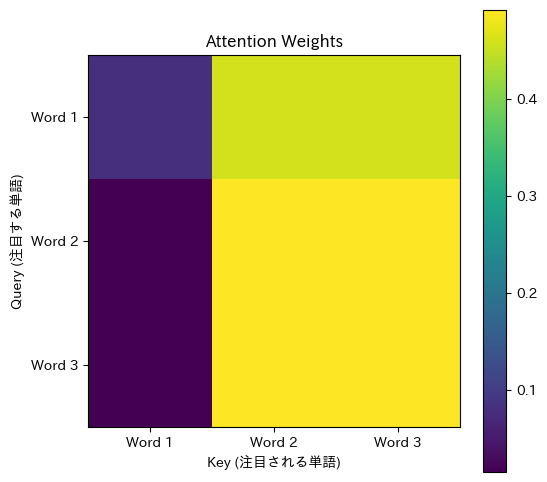

In [21]:
# アテンションウェイトの可視化
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
# グラフの日本語表示をきれいにしてくれる (Colab用)
!pip install japanize-matplotlib --quiet
import japanize_matplotlib
import numpy as np # numpyをインポート

# 可視化
plt.figure(figsize=(6, 6))
# .detach().numpy()は、勾配計算グラフから切り離してNumPy配列に変換します
# 今回は最初から勾配情報のないTensorなので .numpy() だけでOKです
plt.imshow(attention_weights.detach().numpy(), cmap='viridis')
plt.colorbar()


# ticksパラメータに目盛りの位置となるリスト [0, 1, 2] を指定します
plt.xticks(ticks=[0, 1, 2], labels=['Word 1', 'Word 2', 'Word 3'])
plt.yticks(ticks=[0, 1, 2], labels=['Word 1', 'Word 2', 'Word 3'])

plt.xlabel("Key (注目される単語)")
plt.ylabel("Query (注目する単語)")
plt.title("Attention Weights")
plt.show()

# Step 11: [ハンズオン] Self-Attentionの部品作りと組み立て (コンテキストベクトル完成)


In [22]:
# Step 9で計算したVと、Step 10で計算したattention_weightsを使用します
# V = tensor([[1., 2., 1.], [2., 2., 2.], [1., 3., 2.]])
# attention_weights = tensor([[0.0351, 0.2079, 0.7570],...])

# アテンションウェイトとVの行列積を計算
# (3, 3) @ (3, 3) -> (3, 3)
output = torch.matmul(attention_weights, V)

print("--- Value (V) ---")
print(V)
print(f"形状: {V.shape}\n")

print("--- アテンションウェイト ---")
print(attention_weights)
print(f"形状: {attention_weights.shape}\n")

print("--- Self-Attentionの最終出力 (Output) ---")
print(output)
print(f"形状: {output.shape}\n")


--- Value (V) ---
tensor([[0., 2., 1.],
        [2., 0., 2.],
        [1., 2., 2.]], grad_fn=<MmBackward0>)
形状: torch.Size([3, 3])

--- アテンションウェイト ---
tensor([[0.0813, 0.4594, 0.4594],
        [0.0154, 0.4923, 0.4923],
        [0.0154, 0.4923, 0.4923]], grad_fn=<SoftmaxBackward0>)
形状: torch.Size([3, 3])

--- Self-Attentionの最終出力 (Output) ---
tensor([[1.3781, 1.0813, 1.9187],
        [1.4769, 1.0154, 1.9846],
        [1.4769, 1.0154, 1.9846]], grad_fn=<MmBackward0>)
形状: torch.Size([3, 3])



In [23]:
# まとめ：Self-Attentionの実装
class SelfAttention(nn.Module):
    def __init__(self, d_model, d_k, d_v):
        super(SelfAttention, self).__init__()
        self.d_k = d_k
        self.W_q = nn.Linear(d_model, d_k, bias=False)
        self.W_k = nn.Linear(d_model, d_k, bias=False)
        self.W_v = nn.Linear(d_model, d_v, bias=False)

    def forward(self, x):
        # 1. Q, K, Vを生成
        Q = self.W_q(x)
        K = self.W_k(x)
        V = self.W_v(x)

        # 2. アテンションスコアを計算
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        attention_weights = F.softmax(scores, dim=-1)

        # 3. Valueとの加重和で出力を計算
        output = torch.matmul(attention_weights, V)

        return output, attention_weights

# 動作確認
# xはStep 9で定義したもの
# x = torch.tensor([[1.,0.,1.,0.], [0.,2.,0.,2.], [1.,1.,1.,1.]])
attention_layer = SelfAttention(d_model=4, d_k=3, d_v=3)
# 重みを固定しないので、結果は毎回変わります
output, weights = attention_layer(x)

print("\n--- クラスとしてまとめたSelfAttentionの出力 ---")
print(output)





--- クラスとしてまとめたSelfAttentionの出力 ---
tensor([[-0.9142, -0.7301,  0.5723],
        [-0.8489, -0.3002,  0.4859],
        [-0.8912, -0.5570,  0.5392]], grad_fn=<MmBackward0>)


# Step 12: [ハンズオン] マルチヘッド・アテンション - 多角的な視点で文脈を捉える

In [24]:
# マルチヘッド・アテンションの仕組み
import torch
from torch import nn

# --- パラメータ設定 ---
d_model = 512 # モデル全体の次元
num_heads = 8   # ヘッドの数
seq_length = 10 # 系列長
batch_size = 32 # バッチサイズ

# --- マルチヘッド・アテンション層のインスタンス化 ---
# batch_first=True は、テンソルの形状を (batch, seq, feature) の順にすることを指定
multi_head_attn = nn.MultiheadAttention(embed_dim=d_model, num_heads=num_heads, batch_first=True)

# --- ダミーの入力データを作成 ---
# (batch_size, seq_length, d_model)
query = torch.rand(batch_size, seq_length, d_model)
key = torch.rand(batch_size, seq_length, d_model)
value = torch.rand(batch_size, seq_length, d_model)

# --- マルチヘッド・アテンションの実行 ---
# query, key, valueが同じものを入力するのがSelf-Attention
attn_output, attn_output_weights = multi_head_attn(query, key, value)

print("--- 入力テンソル (query) の形状 ---")
print(query.shape)
print("\n")

print("--- マルチヘッド・アテンションの出力形状 ---")
print(f"出力 (attn_output) の形状: {attn_output.shape}")
print(f"アテンションウェイト (attn_output_weights) の形状: {attn_output_weights.shape}")


--- 入力テンソル (query) の形状 ---
torch.Size([32, 10, 512])


--- マルチヘッド・アテンションの出力形状 ---
出力 (attn_output) の形状: torch.Size([32, 10, 512])
アテンションウェイト (attn_output_weights) の形状: torch.Size([32, 10, 10])


# Step 13: 「言葉の順番」を教える魔法 - Positional Encoding

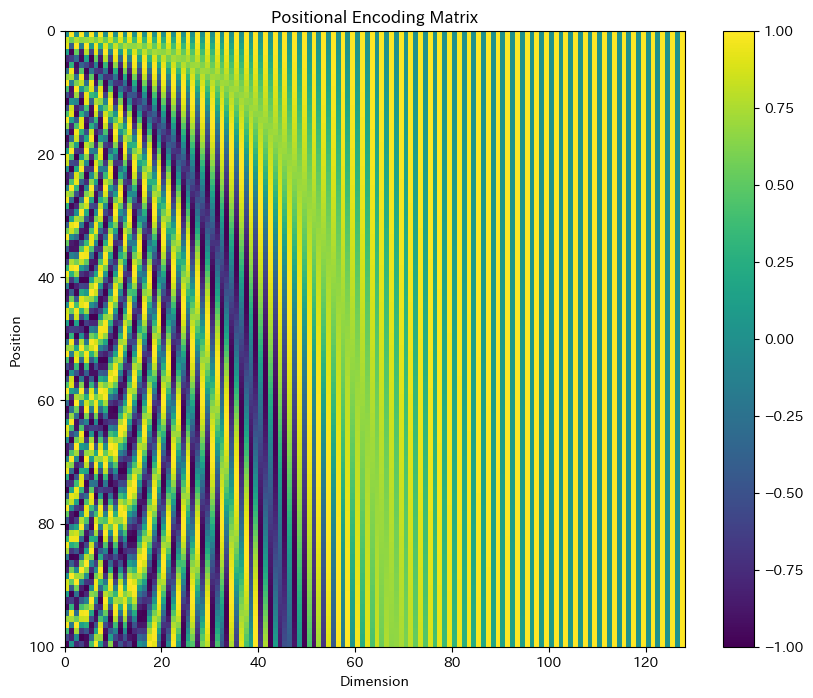

In [25]:
# Positional Encodingの実装と可視化
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        # 位置エンコーディングを計算するための行列を準備 (max_len, d_model)
        pe = torch.zeros(max_len, d_model)

        # 位置(pos)と次元(i)のテンソルを準備
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        # 数式に従って、偶数番目の次元にsin、奇数番目の次元にcosを適用
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        # peをモデルのバッファとして登録する。
        # これはモデルのパラメータではないが、状態として保存したい値に使う。
        self.register_buffer('pe', pe)

    def forward(self, x):
        # 入力x（単語埋め込み）に位置エンコーディングを加算する
        # xの形状は (seq_len, batch_size, d_model) を想定
        # peの形状は (max_len, d_model) なので、xの系列長に合わせてスライスする
        return x + self.pe[:x.size(0), :]

# --- 可視化 ---
d_model = 128
max_len = 100

# PositionalEncodingのインスタンスを作成
pe_layer = PositionalEncoding(d_model, max_len)
positional_encodings = pe_layer.pe.numpy() # バッファから直接取得

plt.figure(figsize=(10, 8))
plt.pcolormesh(positional_encodings, cmap='viridis')
plt.xlabel('Dimension')
plt.xlim((0, d_model))
plt.ylabel('Position')
plt.ylim((max_len, 0))
plt.colorbar()
plt.title("Positional Encoding Matrix")
plt.show()




# Step 14: [ハンズオン] Transformerの部品と全体像 (Encoder Layer)

In [26]:
# nn.TransformerEncoderLayerの実装
import torch
import torch.nn as nn

# --- パラメータ設定 ---
d_model = 512    # 埋め込みベクトルの次元数
nhead = 8        # マルチヘッド・アテンションのヘッド数
dim_feedforward = 2048 # フィードフォワードネットワークの隠れ層の次元数
dropout = 0.1    # ドロップアウト率
batch_size = 32
seq_length = 20

# --- Encoder Layerのインスタンス化 ---
# batch_first=True は、テンソルの形状を (batch, seq, feature) の順にすることを指定
encoder_layer = nn.TransformerEncoderLayer(
    d_model=d_model,
    nhead=nhead,
    dim_feedforward=dim_feedforward,
    dropout=dropout,
    batch_first=True
)

# --- ダミーの入力データを作成 ---
# (batch_size, seq_length, d_model)
src = torch.rand(batch_size, seq_length, d_model)

# --- Encoder Layerの実行 ---
output = encoder_layer(src)

print("--- 入力テンソル (src) の形状 ---")
print(src.shape)
print("\n")

print("--- Encoder Layerの出力形状 ---")
print(output.shape)


--- 入力テンソル (src) の形状 ---
torch.Size([32, 20, 512])


--- Encoder Layerの出力形状 ---
torch.Size([32, 20, 512])


# Step 15: [ハンズオン] Transformerの心臓部を組み立てる (Encoder全体)


In [27]:
# nn.TransformerEncoderの実装
import torch
import torch.nn as nn
import math

# Step 13で作成したPositionalEncodingクラスを再利用
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000): # dropoutを追加するのが一般的
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1) # (max_len, 1, d_model)の形状にする
        self.register_buffer('pe', pe)

    def forward(self, x):
        # xの形状: (seq_len, batch_size, d_model)
        # self.peの形状: (max_len, 1, d_model)
        # スライスしたpeの形状は (seq_len, 1, d_model)となり、ブロードキャスト可能
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

# --- Encoder全体のクラスを定義 ---
class TransformerEncoder(nn.Module):
    def __init__(self, vocab_size, d_model, nhead, dim_feedforward, num_layers, dropout=0.1):
        super().__init__()
        self.d_model = d_model
        # 1. 埋め込み層
        self.embedding = nn.Embedding(vocab_size, d_model)
        # 2. 位置エンコーディング層
        self.pos_encoder = PositionalEncoding(d_model, dropout) # dropoutを渡す
        # 3. N個のEncoder Layerをスタック
        encoder_layer = nn.TransformerEncoderLayer(
            d_model, nhead, dim_feedforward, dropout, batch_first=False
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    def forward(self, src):
        # srcの形状: (seq_length, batch_size)
        # 1. 埋め込み
        src = self.embedding(src) * math.sqrt(self.d_model) # スケーリング
        # 2. 位置エンコーディングを追加
        src = self.pos_encoder(src)
        # 3. N個のEncoder Layerに通す
        output = self.transformer_encoder(src)
        # outputの形状: (seq_length, batch_size, d_model)
        return output

# --- 動作確認 ---
# パラメータ設定
vocab_size = 10000 # 語彙数
d_model = 512
nhead = 8
dim_feedforward = 2048
num_layers = 6 # Encoder Layerを6層重ねる
batch_size = 32
seq_length = 20

# Encoderのインスタンス化
encoder = TransformerEncoder(vocab_size, d_model, nhead, dim_feedforward, num_layers)

# ダミーの入力データ（単語IDの列）を作成
# (seq_length, batch_size)
src_tokens = torch.randint(0, vocab_size, (seq_length, batch_size))

# Encoderの実行
memory = encoder(src_tokens)

print("--- 入力テンソル (単語ID) の形状 ---")
print(src_tokens.shape)
print("\n")
print("--- Encoderの最終出力 (memory) の形状 ---")
print(memory.shape)



--- 入力テンソル (単語ID) の形状 ---
torch.Size([20, 32])


--- Encoderの最終出力 (memory) の形状 ---
torch.Size([20, 32, 512])


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


# Step 16: [ハンズオン] Transformerのもう一つの片翼 (Decoder Layer)


In [28]:
# nn.TransformerDecoderLayerの実装
import torch
import torch.nn as nn

# --- パラメータ設定 ---
d_model = 512
nhead = 8
dim_feedforward = 2048
dropout = 0.1
batch_size = 32
tgt_seq_length = 25 # ターゲット（翻訳文）の系列長
mem_seq_length = 20 # メモリ（原文）の系列長

# --- Decoder Layerのインスタンス化 ---
decoder_layer = nn.TransformerDecoderLayer(
    d_model=d_model,
    nhead=nhead,
    dim_feedforward=dim_feedforward,
    dropout=dropout,
    batch_first=True
)

# --- ダミーの入力データを作成 ---
# ターゲット系列の入力 (batch, tgt_seq_len, d_model)
tgt = torch.rand(batch_size, tgt_seq_length, d_model)
# Encoderからの出力 (memory) (batch, mem_seq_len, d_model)
memory = torch.rand(batch_size, mem_seq_length, d_model)

# --- マスクの作成 ---
# ルックアヘッド・マスク (未来の情報を隠す)
tgt_mask = nn.Transformer.generate_square_subsequent_mask(tgt_seq_length)

# --- Decoder Layerの実行 ---
output = decoder_layer(tgt, memory, tgt_mask=tgt_mask)

print("--- 入力テンソル (tgt) の形状 ---")
print(tgt.shape)
print("--- Encoder出力 (memory) の形状 ---")
print(memory.shape)
print("\n")

print("--- Decoder Layerの出力形状 ---")
print(output.shape)
print("\n")

print("--- ルックアヘッド・マスク (tgt_mask) の中身（一部）---")
print(tgt_mask)


--- 入力テンソル (tgt) の形状 ---
torch.Size([32, 25, 512])
--- Encoder出力 (memory) の形状 ---
torch.Size([32, 20, 512])


--- Decoder Layerの出力形状 ---
torch.Size([32, 25, 512])


--- ルックアヘッド・マスク (tgt_mask) の中身（一部）---
tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
         -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
         -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
         -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
         -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf

# Step 17: [ハンズオン] Transformerのもう一つの片翼を組み立てる (Decoder全体)

In [29]:
# nn.TransformerDecoderの実装
import torch
import torch.nn as nn
import math

# Step 13で作成したPositionalEncodingクラスを修正して再利用
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        # --- 修正のキーポイント ---
        # 形状を(max_len, d_model)から(max_len, 1, d_model)に変更し、
        # バッチ処理に対応できるようにします。
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # xの形状: (seq_len, batch_size, d_model)
        # self.peの形状: (max_len, 1, d_model)
        # 加算時にブロードキャストが機能し、エラーが解消されます。
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

# --- Decoder全体のクラスを定義 ---
class TransformerDecoder(nn.Module):
    def __init__(self, vocab_size, d_model, nhead, dim_feedforward, num_layers, dropout=0.1):
        super().__init__()
        self.d_model = d_model
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout) # 修正済みのクラスを使用
        decoder_layer = nn.TransformerDecoderLayer(
            d_model, nhead, dim_feedforward, dropout, batch_first=False
        )
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)

    def forward(self, tgt, memory, tgt_mask):
        # tgtの形状: (tgt_seq_length, batch_size)
        # memoryの形状: (src_seq_length, batch_size, d_model)
        # 1. 埋め込み
        tgt = self.embedding(tgt) * math.sqrt(self.d_model)
        # 2. 位置エンコーディングを追加
        tgt = self.pos_encoder(tgt)
        # 3. N個のDecoder Layerに通す
        output = self.transformer_decoder(tgt, memory, tgt_mask=tgt_mask)
        # outputの形状: (tgt_seq_length, batch_size, d_model)
        return output

# --- 動作確認 ---
# パラメータ設定 (Step 15と同じ)
tgt_vocab_size = 12000 # ターゲット言語の語彙数
d_model = 512
nhead = 8
dim_feedforward = 2048
num_layers = 6
batch_size = 32
tgt_seq_length = 25
src_seq_length = 20

# Decoderのインスタンス化
decoder = TransformerDecoder(tgt_vocab_size, d_model, nhead, dim_feedforward, num_layers)

# ダミーの入力データを作成
# ターゲット文の単語ID
tgt_tokens = torch.randint(0, tgt_vocab_size, (tgt_seq_length, batch_size))
# Encoderからの出力
memory = torch.rand(src_seq_length, batch_size, d_model)
# ルックアヘッド・マスク
tgt_mask = nn.Transformer.generate_square_subsequent_mask(tgt_seq_length)

# Decoderの実行
output = decoder(tgt_tokens, memory, tgt_mask)

print("--- ターゲット入力 (tgt_tokens) の形状 ---")
print(tgt_tokens.shape)
print("--- Encoder出力 (memory) の形状 ---")
print(memory.shape)
print("\n")
print("--- Decoderの最終出力形状 ---")
print(output.shape)





--- ターゲット入力 (tgt_tokens) の形状 ---
torch.Size([25, 32])
--- Encoder出力 (memory) の形状 ---
torch.Size([20, 32, 512])


--- Decoderの最終出力形状 ---
torch.Size([25, 32, 512])


# Step 18: [ハンズオン] 最終組み立て！完全なTransformerモデル

In [30]:
# Transformerモデルの実装
import torch
import torch.nn as nn
import math

# EncoderとDecoderの実装はStep 15, 17と同じなので省略します
# class PositionalEncoding(nn.Module):...
# class TransformerEncoder(nn.Module):...
# class TransformerDecoder(nn.Module):...

# --- 完全なTransformerモデルのクラスを定義 ---
class TransformerModel(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, nhead,
                 dim_feedforward, num_encoder_layers, num_decoder_layers, dropout=0.1):
        super().__init__()
        # EncoderとDecoderのインスタンス化
        self.encoder = TransformerEncoder(src_vocab_size, d_model, nhead, dim_feedforward, num_encoder_layers, dropout)
        self.decoder = TransformerDecoder(tgt_vocab_size, d_model, nhead, dim_feedforward, num_decoder_layers, dropout)
        # 最終出力層
        self.final_linear = nn.Linear(d_model, tgt_vocab_size)

    def forward(self, src, tgt, tgt_mask):
        # src: (src_seq_len, batch_size)
        # tgt: (tgt_seq_len, batch_size)
        # tgt_mask: (tgt_seq_len, tgt_seq_len)

        # 1. Encoderにソース文を通す
        memory = self.encoder(src)
        # 2. Decoderにターゲット文とmemoryを通す
        decoder_output = self.decoder(tgt, memory, tgt_mask)
        # 3. 最終的な線形層で確率分布に変換
        output = self.final_linear(decoder_output)
        # outputの形状: (tgt_seq_len, batch_size, tgt_vocab_size)
        return output

# --- 動作確認 ---
# パラメータ設定
src_vocab_size = 10000
tgt_vocab_size = 12000
d_model = 512
nhead = 8
dim_feedforward = 2048
num_encoder_layers = 6
num_decoder_layers = 6
batch_size = 32
src_seq_length = 20
tgt_seq_length = 25

# Transformerモデルのインスタンス化
model = TransformerModel(src_vocab_size, tgt_vocab_size, d_model, nhead,
                         dim_feedforward, num_encoder_layers, num_decoder_layers)

# ダミーの入力データを作成
src_tokens = torch.randint(0, src_vocab_size, (src_seq_length, batch_size))
tgt_tokens = torch.randint(0, tgt_vocab_size, (tgt_seq_length, batch_size))
tgt_mask = nn.Transformer.generate_square_subsequent_mask(tgt_seq_length)

# モデルの実行
output = model(src_tokens, tgt_tokens, tgt_mask)

print("--- 入力 (src_tokens) の形状 ---")
print(src_tokens.shape)
print("--- 入力 (tgt_tokens) の形状 ---")
print(tgt_tokens.shape)
print("\n")
print("--- Transformerの最終出力形状 ---")
print(output.shape)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


--- 入力 (src_tokens) の形状 ---
torch.Size([20, 32])
--- 入力 (tgt_tokens) の形状 ---
torch.Size([25, 32])


--- Transformerの最終出力形状 ---
torch.Size([25, 32, 12000])


# Step 19: [ハンズオン] モデルを賢くする！翻訳モデルの学習

# （重要）
## 次のセルを実行するまえに、「ランタイム」→「ランタイムを接続解除して削除」をクリックしてくたさい。

## 次のセルの実行途中で「再起動」を要求してきますが、「キャンセル」してください。


In [1]:
# 【セル1】
# ライブラリをインストールし、その後ランタイムを強制的に再起動させます
# 1. 念のため、再度ライブラリをアンインストールします
print("--- Step 0: 念のため、既存ライブラリをアンインストールします ---")
!pip uninstall torch torchtext torchvision torchaudio torchdata -y

print("--- Step 1: 全てのライブラリをインストールします ---")
!pip install numpy==1.25.2
!pip install torch==2.2.2 torchtext==0.17.2 torchdata==0.7.1 'portalocker>=2.0.0' --no-cache-dir
!python -m spacy download de_core_news_sm
!python -m spacy download en_core_web_sm

print("\n✅ インストールが完了しました。")

print("\n====================================================================")
print("上記の手順が完了しました。")
print("次に、必ず【ランタイムを再起動】してから、学習コードのセルを実行してください。")
print("====================================================================")



--- Step 0: 念のため、既存ライブラリをアンインストールします ---
Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Found existing installation: torchdata 0.11.0
Uninstalling torchdata-0.11.0:
  Successfully uninstalled torchdata-0.11.0
--- Step 1: 全てのライブラリをインストールします ---
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 120.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 310.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 262.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 193.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 279.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 162.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 282.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 354.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 240.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 254.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 256.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 226.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 281.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# （重要）
## 次のセルを実行するまえに、「ランタイム」→「セッションを再起動する」をクリックしてくたさい。

学習を開始します...
Epoch: 1, Train loss: 5.081, Val loss: 3.862, Epoch time = 19.382s, LR: 0.000100
Epoch: 2, Train loss: 3.544, Val loss: 3.163, Epoch time = 19.056s, LR: 0.000100
Epoch: 3, Train loss: 2.990, Val loss: 2.769, Epoch time = 18.763s, LR: 0.000100
Epoch: 4, Train loss: 2.620, Val loss: 2.532, Epoch time = 19.179s, LR: 0.000100
Epoch: 5, Train loss: 2.343, Val loss: 2.358, Epoch time = 18.890s, LR: 0.000100
Epoch: 6, Train loss: 2.124, Val loss: 2.264, Epoch time = 18.917s, LR: 0.000070
Epoch: 7, Train loss: 1.978, Val loss: 2.189, Epoch time = 19.072s, LR: 0.000070
Epoch: 8, Train loss: 1.850, Val loss: 2.115, Epoch time = 19.041s, LR: 0.000070
Epoch: 9, Train loss: 1.741, Val loss: 2.062, Epoch time = 18.886s, LR: 0.000070
Epoch: 10, Train loss: 1.640, Val loss: 2.026, Epoch time = 18.814s, LR: 0.000070
Epoch: 11, Train loss: 1.551, Val loss: 1.981, Epoch time = 19.007s, LR: 0.000049
Epoch: 12, Train loss: 1.480, Val loss: 1.966, Epoch time = 19.085s, LR: 0.000049
Epoch: 13, Tr

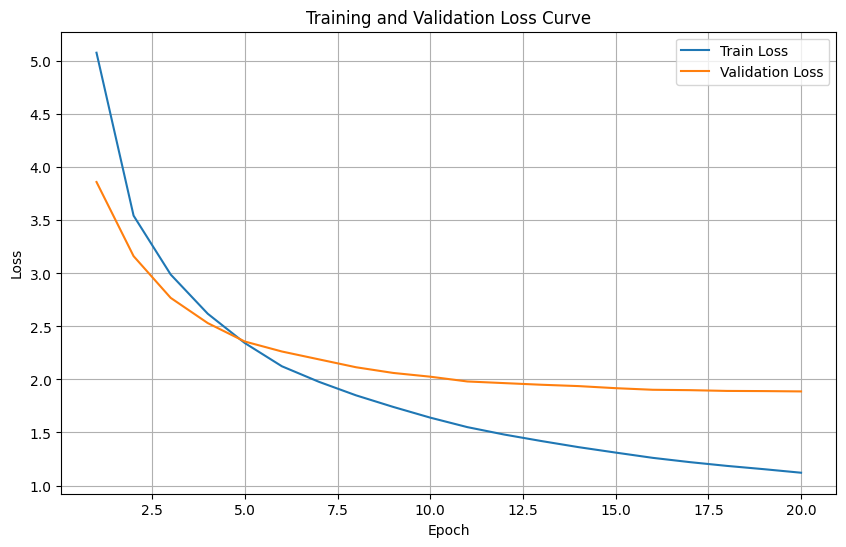

In [1]:
# 【セル2】
# ライブラリのインポートから学習まで、全てのコードを実行します

# =======================================================================
# Step 1: インポートと設定
# =======================================================================
import warnings
warnings.filterwarnings("ignore", message="Support for mismatched key_padding_mask and attn_mask is deprecated.")
warnings.filterwarnings("ignore", message="Some child DataPipes are not exhausted when __iter__ is called.")

import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
import math
from timeit import default_timer as timer
import matplotlib.pyplot as plt


from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.datasets import Multi30k

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# =======================================================================
# Step 2: データ準備
# =======================================================================
SRC_LANGUAGE = 'de'
TGT_LANGUAGE = 'en'
token_transform = {
    SRC_LANGUAGE: get_tokenizer('spacy', language='de_core_news_sm'),
    TGT_LANGUAGE: get_tokenizer('spacy', language='en_core_web_sm')
}
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']
vocab_transform = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    train_iter = Multi30k(split='train', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    vocab_transform[ln] = build_vocab_from_iterator(
        (token_transform[ln](data[0 if ln == SRC_LANGUAGE else 1]) for data in train_iter),
        min_freq=1, specials=special_symbols, special_first=True)
    vocab_transform[ln].set_default_index(UNK_IDX)

def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_batch.append(torch.tensor([BOS_IDX] + vocab_transform[SRC_LANGUAGE](token_transform[SRC_LANGUAGE](src_sample.rstrip("\n"))) + [EOS_IDX], dtype=torch.long))
        tgt_batch.append(torch.tensor([BOS_IDX] + vocab_transform[TGT_LANGUAGE](token_transform[TGT_LANGUAGE](tgt_sample.rstrip("\n"))) + [EOS_IDX], dtype=torch.long))
    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX, batch_first=True)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX, batch_first=True)
    return src_batch, tgt_batch

# =======================================================================
# Step 3: モデル定義
# =======================================================================
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)
    def forward(self, x):
        x = x + self.pe[:x.size(1)].transpose(0, 1)
        return self.dropout(x)

class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, emb_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size
    def forward(self, tokens):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

class Seq2SeqTransformer(nn.Module):
    def __init__(self, num_encoder_layers, num_decoder_layers, emb_size, nhead, src_vocab_size, tgt_vocab_size, dim_feedforward, dropout=0.1):
        super().__init__()
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(emb_size, dropout=dropout)
        self.transformer = nn.Transformer(d_model=emb_size, nhead=nhead, num_encoder_layers=num_encoder_layers, num_decoder_layers=num_decoder_layers, dim_feedforward=dim_feedforward, dropout=dropout, batch_first=True)
        self.generator = nn.Linear(emb_size, tgt_vocab_size)

    def forward(self, src, tgt, src_mask, tgt_mask, src_padding_mask, tgt_padding_mask, memory_key_padding_mask):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(tgt))
        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None, src_padding_mask, tgt_padding_mask, memory_key_padding_mask)
        return self.generator(outs)

def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

# =======================================================================
# Step 4: モデル、損失関数、オプティマイザ、スケジューラの準備
# =======================================================================
SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 2048
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

model = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE, NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)
model.apply(initialize_weights)
model = model.to(DEVICE)

loss_fn = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.7)

# =======================================================================
# Step 5: 訓練・評価ループの定義
# =======================================================================
def create_mask(src, tgt):
    src_seq_len, tgt_seq_len = src.shape[1], tgt.shape[1]
    tgt_mask = nn.Transformer.generate_square_subsequent_mask(tgt_seq_len, device=DEVICE)
    src_mask = torch.zeros((src_seq_len, src_seq_len), device=DEVICE).type(torch.bool)
    src_padding_mask, tgt_padding_mask = (src == PAD_IDX), (tgt == PAD_IDX)
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

def train_epoch(model, optimizer, loss_fn):
    model.train()
    losses = 0
    train_iter = Multi30k(split='train', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    train_dataloader = DataLoader(train_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)
    for src, tgt in train_dataloader:
        src, tgt = src.to(DEVICE), tgt.to(DEVICE)
        tgt_input = tgt[:, :-1]
        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)
        logits = model(src, tgt_input, src_mask, tgt_mask, src_padding_mask, tgt_padding_mask, src_padding_mask)
        optimizer.zero_grad()
        tgt_out = tgt[:, 1:]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        losses += loss.item()
    return losses / len(list(train_dataloader))

def evaluate(model, loss_fn):
    model.eval()
    losses = 0
    val_iter = Multi30k(split='valid', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    val_dataloader = DataLoader(val_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)
    with torch.no_grad():
        for src, tgt in val_dataloader:
            src, tgt = src.to(DEVICE), tgt.to(DEVICE)
            tgt_input = tgt[:, :-1]
            src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)
            logits = model(src, tgt_input, src_mask, tgt_mask, src_padding_mask, tgt_padding_mask, src_padding_mask)
            tgt_out = tgt[:, 1:]
            loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
            losses += loss.item()
    return losses / len(list(val_dataloader))

# =======================================================================
# Step 6: 学習の実行
# =======================================================================
NUM_EPOCHS = 20
train_losses, val_losses = [], []

print("学習を開始します...")
for epoch in range(1, NUM_EPOCHS + 1):
    start_time = timer()
    train_loss = train_epoch(model, optimizer, loss_fn)
    end_time = timer()
    val_loss = evaluate(model, loss_fn)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "
          f"Epoch time = {(end_time - start_time):.3f}s, LR: {optimizer.param_groups[0]['lr']:.6f}")
    scheduler.step()
print("学習が完了しました。")

# =======================================================================
# Step 7: 損失の推移をグラフで可視化
# =======================================================================
print("結果をプロットします...")
plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
# import torchtext
# from torchtext.datasets import Multi30k

# データセットの言語ペアを設定
SRC_LANGUAGE = 'de'
TGT_LANGUAGE = 'en'

# Multi30kの学習用データセットを読み込む
train_iter = Multi30k(split='train', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))

# イテレータをリストに変換して、全体のデータ数を取得
train_data_list = list(train_iter)
# print(train_data_list[1])
total_count = len(train_data_list)

print(f"✅ 学習データの総数: {total_count}件")
print("-" * 40)
print("--- 学習用テキストデータ（Multi30k）のサンプル ---")

# 最初の10件だけ表示
for i, data_pair in enumerate(train_data_list):
    if i >= 10:
        break

    de_text, en_text = data_pair
    print(f"\nサンプル {i+1}:")
    print(f"  ドイツ語 (原文): {de_text}")
    print(f"  英語 (訳文): {en_text}")

print("\n" + "-"*40)


✅ 学習データの総数: 29001件
----------------------------------------
--- 学習用テキストデータ（Multi30k）のサンプル ---

サンプル 1:
  ドイツ語 (原文): Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.
  英語 (訳文): Two young, White males are outside near many bushes.

サンプル 2:
  ドイツ語 (原文): Mehrere Männer mit Schutzhelmen bedienen ein Antriebsradsystem.
  英語 (訳文): Several men in hard hats are operating a giant pulley system.

サンプル 3:
  ドイツ語 (原文): Ein kleines Mädchen klettert in ein Spielhaus aus Holz.
  英語 (訳文): A little girl climbing into a wooden playhouse.

サンプル 4:
  ドイツ語 (原文): Ein Mann in einem blauen Hemd steht auf einer Leiter und putzt ein Fenster.
  英語 (訳文): A man in a blue shirt is standing on a ladder cleaning a window.

サンプル 5:
  ドイツ語 (原文): Zwei Männer stehen am Herd und bereiten Essen zu.
  英語 (訳文): Two men are at the stove preparing food.

サンプル 6:
  ドイツ語 (原文): Ein Mann in grün hält eine Gitarre, während der andere Mann sein Hemd ansieht.
  英語 (訳文): A man in green holds a guitar while the other ma

# Step 20: [ハンズオン] AI翻訳家の実力拝見！推論と評価

In [3]:
# =======================================================================
# Step 8: 推論・翻訳の実行
# =======================================================================
import numpy as np

def generate_square_subsequent_mask(sz):
    return nn.Transformer.generate_square_subsequent_mask(sz, device=DEVICE)

def greedy_decode(model, src, max_len, start_symbol):
    model.eval()
    src = src.to(DEVICE)

    src_emb = model.positional_encoding(model.src_tok_emb(src))
    memory = model.transformer.encoder(src_emb, mask=None).to(DEVICE)

    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)

    for i in range(max_len - 1):
        tgt_mask = generate_square_subsequent_mask(ys.shape[1])

        tgt_emb = model.positional_encoding(model.tgt_tok_emb(ys))
        out = model.transformer.decoder(tgt_emb, memory, tgt_mask)

        prob = model.generator(out[:, -1])
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()

        ys = torch.cat([ys, torch.ones(1, 1).type_as(src).fill_(next_word)], dim=1)
        if next_word == EOS_IDX:
            break
    return ys

def translate(model: torch.nn.Module, src_sentence: str):
    model.eval()

    src_tokens = [BOS_IDX] + vocab_transform[SRC_LANGUAGE](token_transform[SRC_LANGUAGE](src_sentence)) + [EOS_IDX]
    src = torch.tensor(src_tokens, device=DEVICE).unsqueeze(0)

    tgt_tokens = greedy_decode(model, src, max_len=len(src_tokens) + 5, start_symbol=BOS_IDX).squeeze(0)

    translated_words = vocab_transform[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu().numpy()))
    return " ".join(translated_words).replace("<bos>", "").replace("<eos>", "").strip()

# 翻訳の実行
german_sentence = "Eine Gruppe von Menschen steht vor einem Gebäude."
english_translation = translate(model, german_sentence)

print("\n" + "-" * 30)
print("翻訳テストを実行します。")
print(f"原文 (ドイツ語): {german_sentence}")
print(f"翻訳 (英語): {english_translation}")



------------------------------
翻訳テストを実行します。
原文 (ドイツ語): Eine Gruppe von Menschen steht vor einem Gebäude.
翻訳 (英語): A group of people standing in front of a building .


## うまく翻訳できているようです！
## おめでとうございます！

### あなたは、AIの歴史における重要なブレークスルーであるTransformerモデルの基本原理を学び、その心臓部であるSelf-Attentionを実装し、最終的には完全な翻訳モデルを訓練・実行するまでの長い冒険をやり遂げました。

### この知識は、ChatGPTのような大規模言語モデルや、画像生成AIなど、現代の最先端AI技術を理解するための強力な土台となるでしょう。これからもAIの世界の探求を楽しんでください！
